# k-NN PCA applied to reduced train and test dataset 

## Importing libraries

In [39]:
import utils.functions as utils


from sklearn.decomposition import PCA
import sklearn
import json
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from math import sqrt
from tqdm import tqdm
from random import sample
from pandas_ml import ConfusionMatrix
import pandas_ml as pdml
import matplotlib.pyplot as plt
%matplotlib notebook

import time
import seaborn

## Todo

- Normalize signature coordinates (using test_set)

In [19]:
train_path = 'json/trainList_416_ClusterCentroid_400max_vote_hard.json'
train_path = 'json/trainList_416_ClusterCentroid_400max.json'
test_path = 'json/testList_416_100perF100perC.json'

### Loading datasets

In [20]:
try:
    f_train = open(train_path,'r')
    f_test = open(test_path,'r')
    json_train = json.load(f_train)
    json_test = json.load(f_test)
finally:
    f_train.close()
    f_test.close()

## Classification with full subsampled dataset

In [21]:
x_train,y_train = utils.parse_data(json_train)
x_test,y_test = utils.parse_data(json_test)

### Nearest Neighbors Classifier

If tqdm package raises an error, please run 

> jupyter nbextension install --py --sys-prefix widgetsnbextension

in your anaconda prompt.

C:\Users\fva3\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


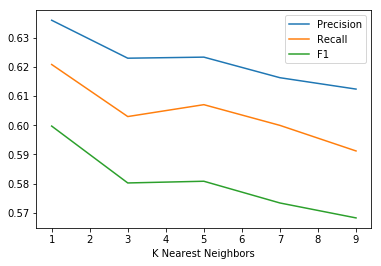

In [36]:
ks = []
precisions = []
recalls = []
f1s = []

for k in range(1,10,2):
    neigh = KNeighborsClassifier(n_neighbors = k, n_jobs = 14)
    neigh.fit(x_train,y_train)
    y_pred = neigh.predict(x_test)

    #Calculating scores
    precision, recall, f1 = utils.precision_recall_f1(y_test,y_pred)
    
    ks.append(k)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)

fig, ax = plt.subplots()
ax.plot(ks,precisions, label = 'Precision')
ax.plot(ks,recalls, label = 'Recall')
ax.plot(ks,f1s, label = 'F1')
ax.legend()
ax.set_xlabel('K Nearest Neighbors')
fig.show()

In [37]:
norma = utils.Normalizer(x_train)
x_train = norma.normalize(x_train)
x_test = norma.normalize(x_test)

C:\Users\fva3\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


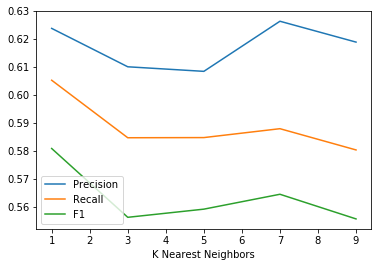

In [38]:
ks = []
precisions = []
recalls = []
f1s = []

for k in range(1,10,2):
    neigh = KNeighborsClassifier(n_neighbors = k, n_jobs = 14)
    neigh.fit(x_train,y_train)
    y_pred = neigh.predict(x_test)

    #Calculating scores
    precision, recall, f1 = utils.precision_recall_f1(y_test,y_pred)
    
    ks.append(k)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)

fig, ax = plt.subplots()
ax.plot(ks,precisions, label = 'Precision')
ax.plot(ks,recalls, label = 'Recall')
ax.plot(ks,f1s, label = 'F1')
ax.legend()
ax.set_xlabel('K Nearest Neighbors')
fig.show()

## Classification with TP45 dataset

In [11]:
f = open('tp45.txt','r')
labels_to_keep = f.readlines()
for i in range(len(labels_to_keep)):
    labels_to_keep[i] = labels_to_keep[i][:-1]

x_train,y_train = utils.parse_data_filter(json_train, labels_to_keep)
x_test,y_test = utils.parse_data_filter(json_test, labels_to_keep)

WARNING ankles-anchor-rod-expansion-bolt  has 0
WARNING coaxial-gear-reducers  has 0
WARNING roller-torque-limiters  has 0
WARNING square-nuts  has 0
WARNING wingnuts  has 0
WARNING cap-nuts  has 0
WARNING lobed-seals  has 0


### Nearest Neighbors

In [24]:
neigh = KNeighborsClassifier(n_neighbors = 5, n_jobs = 7)
neigh.fit(x_train,y_train)
y_pred = neigh.predict(x_test)

#Calculating scores
precision, recall, f1 = utils.precision_recall_f1(y_test,y_pred)

#Printing
print('Results for 3 NN')
print('Precision: ', precision)
print('Recall', recall)
print('f1', f1)

Results for 3 NN
Precision:  0.6233414923376014
Recall 0.6070403007838528
f1 0.5807786499104032


#### Normalizing coordinates

In [13]:
norma = utils.Normalizer(x_train)
x_train = norma.normalize(x_train)
x_test = norma.normalize(x_test)

(array([3.4270e+03, 1.0000e+00, 1.7000e+01, 0.0000e+00, 0.0000e+00,
        2.7114e+04, 3.1840e+03, 6.1000e+01, 8.0000e+00, 1.2000e+01]),
 array([  0. ,  23.6,  47.2,  70.8,  94.4, 118. , 141.6, 165.2, 188.8,
        212.4, 236. ]),
 <a list of 10 Patch objects>)

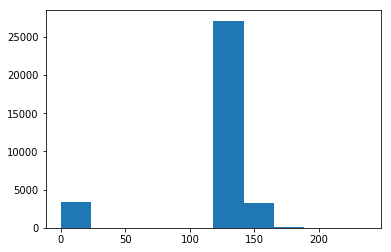

In [17]:
from collections import Counter
c = Counter(np.argmin(x_train, axis = 1))
plt.hist(np.argmin(x_train, axis = 1))

## 1. Declaring some functions and the datasets' paths

Text

In [ ]:
def getDataFrameFromJson(path): 
    '''
    returns dataFrame obtained from Json file
    :param path: path of the json file
    '''
    f = open(path,'r')
    try:
        df = pd.DataFrame(json.load(f))
        print("Data size: ", df.shape)
    finally:
        f.close()
    return df

def name_at_level(string,level):
    '''
    receives a string with the entire label for a certain object
    and cuts the right half
    :param string: the label as a string
    :param level: desired level
    '''
    if level != 3:
        index = -len(string.split('/'))+level+3
        index = min(len(string.split('/')) + index, len(string.split('/'))+1)
        out = '/'.join(string.split('/')[:index])
        if out[-1] != '/':
            out += '/'
    else:
        out = string
    '''
    string = string.split('mechanical-systems-and-components-of-general-use/')[-1]
    string = string.split('/')
    string = string[min(level-1,len(string)-1)]
    '''
    return get_radical(out)

def getCategories(Y,level):
    '''
    
    :param Y: list of strings (containing the labels)
    returns the list after applying 'name at level' to each label
    '''
    for i in range(len(Y)):
        Y[i] = name_at_level(Y[i],level)
    return Y

def comparison(row,level):
    '''
    taking two strings, it compares if the predicted string
    is OK considering a certain level
    '''
    return row['prediction{}'.format(level)] in row['label']
    
def getSignature(l):
    '''
    In case of having the signatures as a string,
    converts it into a list of floats
    :param l: list of strings containing N signatures 
    '''
    if type(l[0]) != str:
        return l
    for k in range(len(l)):
        temp = l[k].split(' ')
        for i in range(len(temp)):
            temp[i] = float(temp[i])
        l[k] = temp
    return list(l)
def get_radical(name):
    return name.replace('/ics-traceparts-classification/mechanical-systems-and-components-of-general-use/','')

def getPrecision(cnf_matrix):
    cnf_matrix = cnf_matrix.to_dataframe()
    labels = list(cnf_matrix.columns.values)
    precisionByClass = {}
    overallPrec = 0
    for label in labels:
        true_positives = cnf_matrix[label][label]
        if true_positives != 0:
            totalPred = cnf_matrix[label].sum()
            precisionByClass[label] = true_positives/totalPred
            overallPrec += true_positives/totalPred
        else:
            precisionByClass[label] = 0
            overallPrec += 0
    overallPrec = overallPrec/len(labels)
    return (overallPrec,precisionByClass)

def trainHasInstance(value):
    return value in list(dfTrain['label'].values)

def testHasInstance(value):
    return value in list(dfTest['label'].values)

def not_ambiguous_classes(value):
    return value.count('/') == 6   
def kNN(dfTrain,dfTest,k = 1, level = 3):
    '''
    from two dataframes, k neighbours at level 3,
    evaluates the results of the entire dataframe dfTest
    '''
    neigh = KNeighborsClassifier(n_neighbors=k, n_jobs = 14)
    X = list(dfTrain['shape_3D_signature'].values)
    Y = list(dfTrain['label'].values)
    Y = getCategories(Y.copy(),level)
    print('Fitting...')
    neigh.fit(X,Y)
    print('Predicting...')
    start = time.time()
    predictions = neigh.predict(list(dfTest['shape_3D_signature'].values).copy())
    print('Elapsed time: ', time.time() - start)
    dfTest['prediction{}'.format(level)]  = predictions
    dfTest['good_prediction{}'.format(level)] = dfTest.apply(lambda row:comparison(row,level),axis=1)
    return neigh, dfTest

def kNNHierachical(dfTrain,dfTest,k1 = 1, k2 = 1, k3 = 3):
    
    pass

'''
Write your data path below
'''
    
    
trainPath = 'e:/Step3/trainListV2_sp0.9_sf09_ICS_random.json'
testPath = 'e:/testList_100perF.json'

trainPath = 'e:/Step3/trainListV2_sp0.9_sf09_ICS_randomAllInfo2.json'
testPath = 'e:/Step3/testList_100perF_100perCAllInfo.json'

trainPath = 'e:/trainListV2_sp0.9_sf0.9_ICSClusterCentroid2.json'
testPath = 'e:/Step3/testList_100perF_100perCAllInfo.json'

trainPath = 'e:/Datasets/trainListV2_sp0.9_sf0.9_ICSClusterCentroid_Normalized.json'
trainPath = 'e:/Datasets/trainListV2_sp0.9_sf0.9_ICSClusterCentroid.json'
testPath = 'e:/Datasets/testList_100perF_100perC.json'


trainPath = 'e:/Datasets/trainList_416_ClusterCentroid_1000max.json'
trainPath = 'e:/Datasets/trainList_416_ClusterCentroid_1000max_tomek.json'

trainPath = 'e:/Datasets/new_train_embeddings.json'
testPath = 'e:/Datasets/new_test_embeddings.json'



trainPath = 'e:/Datasets/After cleaning/trainList_416_ClusterCentroid_400max_vote_hard_cleaning.json'
testPath = 'e:/Datasets/After cleaning/testList_416_100perF100perC_cleaning.json'

trainPath = 'e:/Datasets/train_triplet_family.npy'
testPath = 'e:/Datasets/test_triplet_family.npy'

trainPath = 'e:/Datasets/trainList_416_ClusterCentroid_400max_vote_hard.json'
testPath = 'e:/Datasets/testList_416_100perF100perC.json'


## 2. Applying kNN to raw input data

In [ ]:
'''
Loading pandas DataFrame from Json file
'''
dfTrain = getDataFrameFromJson(trainPath)
dfTest = getDataFrameFromJson(testPath)

#dfTest = dfTest[dfTest['label'].map(trainHasInstance)] #
#dfTrain = dfTrain[dfTrain['label'].map(testHasInstance)] # if you want to keep only the classes that exists simultaneosly in the test data and the train data

# dfTest = dfTest[dfTest['label'].map(not_ambiguous_classes)] 
# dfTrain = dfTrain[dfTrain['label'].map(not_ambiguous_classes)] 
#number of neighbours
k_neigh = 1
print(dfTrain.shape)
print(dfTest.shape)

In [ ]:
dfTrain 

In [ ]:
#creating columns with the labels of 
dfTrain['label1'] = dfTrain.apply(lambda row: name_at_level(row['label'],1), axis = 1)
dfTrain['label2'] = dfTrain.apply(lambda row: name_at_level(row['label'],2), axis = 1)
dfTrain['label3'] = dfTrain.apply(lambda row: name_at_level(row['label'],3), axis = 1)
dfTest['label1'] = dfTest.apply(lambda row: name_at_level(row['label'],1), axis = 1)
dfTest['label2'] = dfTest.apply(lambda row: name_at_level(row['label'],2), axis = 1)
dfTest['label3'] = dfTest.apply(lambda row: name_at_level(row['label'],3), axis = 1)


### 2.1. k-NN at level 1

In [ ]:
#title for storing the confusion matrix
custom_title = trainPath.split('/')[-1].split('.')[0] + '_trainclean0.5' 

In [ ]:
level = 1
neigh,dfTest = kNN(dfTrain,dfTest, level = level, k = k_neigh)
print('Overall TP rate (biased): ',(dfTest['good_prediction{}'.format(level)] == True).sum()/dfTest.shape[0])

column = 'prediction{}'.format(level)
y_pred = getCategories(list(dfTest[column]).copy(),level)
y_true = getCategories(list(dfTest['label1']).copy(),level)

confusion_matrix = ConfusionMatrix(y_true, y_pred)
confusion_matrix.plot(normalized=True)
plt.savefig('e:/Step3/confusion_matrix_level' + str(level) + custom_title + '.png', format='png', dpi=1000,bbox_inches='tight')
plt.show()

overallPrec1, precisionByClass1 = getPrecision(confusion_matrix)
print('Overall precisionn: ', overallPrec1, '\nPrecision by class: ', precisionByClass1)

np.save('e:/ConfusionMatrix/level{0}_{1}neighbours_'.format(str(level),str(k_neigh)) + custom_title + '.npy',sklearn.metrics.confusion_matrix(y_true, y_pred))

### 2.2. k-NN at level 2

In [ ]:
level = 2
neigh,dfTest = kNN(dfTrain,dfTest,level = level, k = k_neigh)
print((dfTest['good_prediction{}'.format(level)] == True).sum()/dfTest.shape[0])

column = 'prediction{}'.format(level)
y_pred = getCategories(list(dfTest[column]).copy(),level)
y_true = getCategories(list(dfTest['label{}'.format(level)]).copy(),level)
confusion_matrix = ConfusionMatrix(y_true, y_pred)

confusion_matrix.plot(normalized=True)
plt.savefig('e:/Step3/confusion_matrix_level' + str(level) + custom_title + '.png', format='png', dpi=1000,bbox_inches='tight')
plt.show()

overallPrec2, precisionByClass2 = getPrecision(confusion_matrix)
print('Overall precisionn: ', overallPrec2, '\nPrecision by class: ', precisionByClass2)
np.save('e:/ConfusionMatrix/level{0}_{1}neighbours_'.format(str(level),str(k_neigh)) + custom_title + '.npy',sklearn.metrics.confusion_matrix(y_true, y_pred))

### 2.3. k-NN at level 3

In [ ]:
level = 3
neigh,dfTest = kNN(dfTrain,dfTest,level = 3, k = k_neigh)
print((dfTest['good_prediction{}'.format(level)] == True).sum()/dfTest.shape[0])

column = 'prediction{}'.format(level)
y_pred = getCategories(list(dfTest[column]).copy(),level)
y_true = getCategories(list(dfTest['label{}'.format(level)]).copy(),level)
confusion_matrix = ConfusionMatrix(y_true, y_pred)

confusion_matrix.plot(normalized=True)
plt.savefig('e:/Step3/confusion_matrix_level' + str(level) + custom_title + '.png', format='png', dpi=1000,bbox_inches='tight')
plt.show()

overallPrec3, precisionByClass3 = getPrecision(confusion_matrix)
print('Overall precisionn: ', overallPrec3, '\nPrecision by class: ', precisionByClass3)
np.save('e:/ConfusionMatrix/level{0}_{1}neighbours_'.format(str(level),str(k_neigh)) + custom_title + '.npy',sklearn.metrics.confusion_matrix(y_true, y_pred))

In [ ]:
dist, ind = neigh.kneighbors(list(dfTest['shape_3D_signature'].values), n_neighbors=50, return_distance=True)

In [ ]:
X = np.array(list(dfTrain['shape_3D_signature'].values))
Y = np.array(list(dfTrain['label'].values))
Y_test = np.array(list(dfTest['label'].values))

In [ ]:
first_50_labels = []
for i in range(ind.shape[0]):
    l = []
    for j in range(ind.shape[1]):
        l.append(Y[ind[i,j]])
    first_50_labels.append(l)
first_50_labels = np.array(first_50_labels)
        

In [ ]:
def is_in_top(true_labels,sorted_labels):
    rank = []
    for i in range(sorted_labels.shape[0]):
        indexes = np.where(sorted_labels[i] == true_labels[i])[0]
        if indexes.shape[0] < 1:
            rank.append(100)
        else:
            rank.append(np.min(indexes))
    return np.array(rank)

rank = is_in_top(Y_test,first_50_labels)
    

In [ ]:
for i in [1,3,5,10]:
    print('Top ',i,': ', np.sum(rank < i)/rank.shape[0])

### 2.4. Analysing true positive rate and precision

In [ ]:
uniqueLabels = np.unique(np.array(dfTest['label'].values))
uniqueLabels2 = np.unique(np.array(dfTest['label2'].values))
uniqueLabels1 = np.unique(np.array(dfTest['label1'].values))

def goodPredictionForLabel(row, label, level):
    label = name_at_level(label,level)
    if label not in row['label'] :
        return False
    column = 'good_prediction' + str(level)
    return row[column]


counts1 = []
counts2 = []
counts3 = []
countsT1 = []
countsT2 = []
countsT3 = []
good1 = []
good2 = []
good3 = []
precision1 = []
precision2 = []
precision3 = []

for i in range(len(uniqueLabels)):
    label = uniqueLabels[i]
    #if label == "/ics-traceparts-classification/mechanical-systems-and-components-of-general-use/fasteners/pins-nails/":
    #    continue
    #size of train data for each class at each level
    counterT3 = dfTrain.apply(lambda row: name_at_level(label,3) in row['label'],axis = 1).sum()
    #size of test data for each class at each level
    counter3 = dfTest.apply(lambda row: name_at_level(label,3) in row['label'],axis = 1).sum()

    good3_ = dfTest.apply(lambda row: goodPredictionForLabel(row,label,3),axis = 1).sum()/counter3
    
    countsT3.append(counterT3)
    counts3.append(counter3)
    good3.append(good3_)
    precision3.append(precisionByClass3[name_at_level(label,3)])

for i in range(len(uniqueLabels2)):
    label = uniqueLabels2[i]
     #size of train data for each class at each level    
    counterT2 = dfTrain.apply(lambda row: label in row['label2'],axis = 1).sum()   
    #size of test data for each class at each level 
    counter2 = dfTest.apply(lambda row: label in row['label2'],axis = 1).sum()
    good2_ = dfTest.apply(lambda row: goodPredictionForLabel(row,label,2),axis = 1).sum()/counter2
    countsT2.append(counterT2)
    counts2.append(counter2)
    good2.append(good2_)
    precision2.append(precisionByClass2[name_at_level(label,2)])

for i in range(len(uniqueLabels1)):
    label = uniqueLabels1[i]
     #size of train data for each class at each level    
    counterT1 = dfTrain.apply(lambda row: label in row['label1'],axis = 1).sum()   
    #size of test data for each class at each level 
    counter1 = dfTest.apply(lambda row: label in row['label1'],axis = 1).sum()
    good1_ = dfTest.apply(lambda row: goodPredictionForLabel(row,label,1),axis = 1).sum()/counter1
    countsT1.append(counterT1)
    counts1.append(counter1)
    good1.append(good1_)
    precision1.append(precisionByClass1[name_at_level(label,1)])
    

In [ ]:
plt.scatter(countsT1,good1)
plt.xlabel('Size of train dataset  at level 1', fontsize=18)
plt.ylabel('True positives at level 1', fontsize=16)
plt.savefig('e:/Step3/TruePositivesVsTrainSize1_ClusteredDataSet.png', format='png', dpi=1000,bbox_inches='tight')

In [ ]:
plt.scatter(countsT1,precision1)
plt.xlabel('Size of train dataset  at level 1', fontsize=18)
plt.ylabel('Precision at level 1', fontsize=16)
plt.savefig('e:/Step3/PrecisionVsTrainSize1_ClusteredDataSet.png', format='png', dpi=1000,bbox_inches='tight')

In [ ]:
plt.scatter(countsT2,good2)
plt.xlabel('Size of train dataset  at level 2', fontsize=18)
plt.ylabel('True positives at level 2', fontsize=16)
plt.savefig('e:/Step3/TruePositivesVsTrainSize2_ClusteredDataSet.png', format='png', dpi=1000,bbox_inches='tight')

In [ ]:
plt.scatter(countsT2,precision2)
plt.xlabel('Size of train dataset  at level 2', fontsize=18)
plt.ylabel('Precision at level 2', fontsize=16)
plt.savefig('e:/Step3/PrecisionVsTrainSize2__ClusteredDataSet.png', format='png', dpi=1000,bbox_inches='tight')

In [ ]:
plt.scatter(countsT3,good3)
plt.xlabel('Size of train dataset  at level 3', fontsize=18)
plt.ylabel('True positives at level 3', fontsize=16)
plt.savefig('e:/Step3/TruePositivesVsTrainSize3__ClusteredDataSet.png', format='png', dpi=1000,bbox_inches='tight')

In [ ]:
plt.scatter(countsT3,precision3)
plt.xlabel('Size of train dataset  at level 3', fontsize=18)
plt.ylabel('Precision at level 3', fontsize=16)
plt.savefig('e:/Step3/PrecisionVsTrainSize3__ClusteredDataSet.png', format='png', dpi=1000,bbox_inches='tight')

In [ ]:
countsT3 = np.array(countsT3)
good3 = np.array(good3)
print(uniqueLabels[np.where(countsT3 > 350)])

Analysing the objects from the classes 'linear motion systems' and 'track roller linear guidance systems', one can see a lot of differences between the objects of the same class. See examples below:

<img src="trackrollerlinerguidancesystems1.PNG">
<img src="trackrollerlinerguidancesystems2.PNG">

## Balancing data

### 3. SMOTE

In [ ]:
custom_title = trainPath.split('/')[-1].split('.')[0] + '_EKNN'

In [ ]:
dfTrain = getDataFrameFromJson(trainPath)
dfTest = getDataFrameFromJson(testPath)

#dfTrain = dfTrain[dfTrain['label'].map(hasInstance)]
#dfTest = dfTest[dfTest['label'].map(trainHasInstance)]
#dfTrain = dfTrain[dfTrain['label'].map(testHasInstance)]
dfTest.reset_index(inplace = True)
dfTrain.reset_index(inplace = True)

k_neigh = 1
print(dfTrain.shape)
print(dfTest.shape)

In [ ]:

#adapting the data Frame in order to apply sampling
labelAndCount = dict(zip(dfTrain.groupby('label')['id'].count().index,dfTrain.groupby('label')['id'].count().values))
a = pd.DataFrame(list(dfTrain['shape_3D_signature']))
dfTrain = dfTrain.drop('id', axis = 1)
dfTrain = dfTrain.drop('index', axis = 1)
dfTrain = dfTrain.drop('shape_3D_signature', axis = 1)

In [ ]:
df = pdml.ModelFrame(pd.concat([dfTrain,a],axis = 1), target = 'label')

def getMinorities(dic,limit):
    minorities = []
    for key in dic.keys():
        if dic[key]<limit:
            minorities.append(key)
    return minorities
'''
setting sampling ratio

'''
samplingRatioOn = True
if samplingRatioOn == True:
    minorities = getMinorities(labelAndCount,400)
    desiredSamples = [min(labelAndCount[minority]*3,400) for minority in minorities]
    desiredSamples = np.array([400 for obj in minorities])
    sampler = df.imbalance.over_sampling.SMOTE(ratio = dict(zip(minorities,desiredSamples)), k = 1)
else:
    sampler = df.imbalance.over_sampling.SMOTE(k = 3)
sampled = df.fit_sample(sampler)
sampled.head()

sampled['signature'] = list(sampled.drop('label',axis = 1).values)

print(dfTrain.shape,sampled.shape)

dfTrain = pd.concat([sampled['label'],sampled['signature']], axis = 1)
dfTrain = dfTrain.rename(index=str, columns={"signature": "shape_3D_signature"})


In [ ]:
df = pdml.ModelFrame(pd.concat([dfTrain,a],axis = 1), target = 'label')
'''
SMOTE Tomek
'''

def getMinorities(dic,limit):
    minorities = []
    for key in dic.keys():
        if dic[key]<limit:
            minorities.append(key)
    return minorities
'''
setting sampling ratio

'''

minorities = getMinorities(labelAndCount,400)
desiredSamples = [min(labelAndCount[minority]*3,400) for minority in minorities]
desiredSamples = np.array([400 for obj in minorities])
sampler = df.imbalance.combine.SMOTETomek(ratio = 'all',random_state = 42)

sampled = df.fit_sample(sampler)
sampled.head()

sampled['signature'] = list(sampled.drop('label',axis = 1).values)

print(dfTrain.shape,sampled.shape)

dfTrain = pd.concat([sampled['label'],sampled['signature']], axis = 1)
dfTrain = dfTrain.rename(index=str, columns={"signature": "shape_3D_signature"})


In [ ]:
df = pdml.ModelFrame(pd.concat([dfTrain,a],axis = 1), target = 'label')
'''
Edited kNN
'''

def getMajorities(dic,limit):
    majorities = []
    for key in dic.keys():
        if dic[key]>limit:
            majorities.append(key)
    return majorities
'''
setting sampling ratio

'''

majorities = getMajorities(labelAndCount,400)
desiredSamples = [min(labelAndCount[majority]*3,400) for majority in majorities]
desiredSamples = np.array([400 for obj in majorities])
ratio_dict = dict(zip(majorities,desiredSamples))
sampler = df.imbalance.under_sampling.EditedNearestNeighbours(ratio = ratio_dict,random_state = 42, n_jobs = -1)

sampled = df.fit_sample(sampler)
sampled.head()

sampled['signature'] = list(sampled.drop('label',axis = 1).values)

print(dfTrain.shape,sampled.shape)

dfTrain = pd.concat([sampled['label'],sampled['signature']], axis = 1)
dfTrain = dfTrain.rename(index=str, columns={"signature": "shape_3D_signature"})

In [ ]:
#creating columns with the labels of 
dfTrain['label1'] = dfTrain.apply(lambda row: name_at_level(row['label'],1), axis = 1)
dfTrain['label2'] = dfTrain.apply(lambda row: name_at_level(row['label'],2), axis = 1)
dfTrain['label3'] = dfTrain.apply(lambda row: name_at_level(row['label'],3), axis = 1)
dfTest['label1'] = dfTest.apply(lambda row: name_at_level(row['label'],1), axis = 1)
dfTest['label2'] = dfTest.apply(lambda row: name_at_level(row['label'],2), axis = 1)
dfTest['label3'] = dfTest.apply(lambda row: name_at_level(row['label'],3), axis = 1)

In [ ]:
for minority in minorities:
    print(minority, labelAndCount[minority])

In [ ]:
level = 1
neigh,dfTest = kNN(dfTrain,dfTest, level = level, k = k_neigh)
print((dfTest['good_prediction{}'.format(level)] == True).sum()/dfTest.shape[0])

column = 'prediction{}'.format(level)
y_pred = getCategories(list(dfTest[column]).copy(),level)
y_true = getCategories(list(dfTest['label']).copy(),level)

confusion_matrix = ConfusionMatrix(y_true, y_pred)


confusion_matrix.plot(normalized=True)
plt.savefig('e:/Step3/confusion_matrix_level' + str(level) + '.png', format='png', dpi=1000,bbox_inches='tight')
plt.show()

overallPrec1, precisionByClass1 = getPrecision(confusion_matrix)
print('Overall precisionn: ', overallPrec1, '\nPrecision by class: ', precisionByClass1)
np.save('e:/ConfusionMatrix/level{0}_{1}neighbours_'.format(str(level),str(k_neigh)) + custom_title + '.npy',sklearn.metrics.confusion_matrix(y_true, y_pred))

In [ ]:
level = 2
neigh,dfTest = kNN(dfTrain,dfTest,level = level, k = k_neigh)
print((dfTest['good_prediction{}'.format(level)] == True).sum()/dfTest.shape[0])

column = 'prediction{}'.format(level)
y_pred = getCategories(list(dfTest[column]).copy(),level)
y_true = getCategories(list(dfTest['label']).copy(),level)
confusion_matrix = ConfusionMatrix(y_true, y_pred)

confusion_matrix.plot(normalized=True)
plt.savefig('e:/Step3/confusion_matrix_level' + str(level) + '_OnlySMOTE.png', format='png', dpi=1000,bbox_inches='tight')
plt.show()

overallPrec2, precisionByClass2 = getPrecision(confusion_matrix)
print('Overall precisionn: ', overallPrec2, '\nPrecision by class: ', precisionByClass2)
np.save('e:/ConfusionMatrix/level{0}_{1}neighbours_'.format(str(level),str(k_neigh)) + custom_title + '.npy',sklearn.metrics.confusion_matrix(y_true, y_pred))

In [ ]:
level = 3
neigh,dfTest = kNN(dfTrain,dfTest,level = level, k = k_neigh)
print((dfTest['good_prediction{}'.format(level)] == True).sum()/dfTest.shape[0])

column = 'prediction{}'.format(level)
y_pred = getCategories(list(dfTest[column]).copy(),level)
y_true = getCategories(list(dfTest['label']).copy(),level)
confusion_matrix = ConfusionMatrix(y_true, y_pred)

confusion_matrix.plot(normalized=True)
plt.savefig('e:/Step3/confusion_matrix_level' + str(level) + '_OnlySMOTE.png', format='png', dpi=1000,bbox_inches='tight')
plt.show()

overallPrec3, precisionByClass3 = getPrecision(confusion_matrix)
print('Overall precisionn: ', overallPrec3, '\nPrecision by class: ', precisionByClass3)
np.save('e:/ConfusionMatrix/level{0}_{1}neighbours_'.format(str(level),str(k_neigh)) + custom_title + '.npy',sklearn.metrics.confusion_matrix(y_true, y_pred))

### 3.2. Analysing true positive rate

In [ ]:
dfTrain['label1'] = dfTrain.apply(lambda row: name_at_level(row['label'],1), axis = 1)
dfTrain['label2'] = dfTrain.apply(lambda row: name_at_level(row['label'],2), axis = 1)
dfTest['label1'] = dfTest.apply(lambda row: name_at_level(row['label'],1), axis = 1)
dfTest['label2'] = dfTest.apply(lambda row: name_at_level(row['label'],2), axis = 1)

uniqueLabels = np.unique(np.array(dfTest['label'].values))
uniqueLabels2 = np.unique(np.array(dfTest['label2'].values))
uniqueLabels1 = np.unique(np.array(dfTest['label1'].values))

def goodPredictionForLabel(row, label, level):
    #label = name_at_level(label,level)
    if label not in row['label'] :
        return False
    column = 'good_prediction' + str(level)
    return row[column]


counts1 = []
counts2 = []
counts3 = []
countsT1 = []
countsT2 = []
countsT3 = []
good1 = []
good2 = []
good3 = []
precision1 = []
precision2 = []
precision3 = []

for i in range(len(uniqueLabels)):
    label = uniqueLabels[i]
    if label == "/ics-traceparts-classification/mechanical-systems-and-components-of-general-use/fasteners/pins-nails/":
        continue
    #size of train data for each class at each level
    counterT3 = dfTrain.apply(lambda row: name_at_level(label,3) in row['label'],axis = 1).sum()
    #size of test data for each class at each level
    counter3 = dfTest.apply(lambda row: name_at_level(label,3) in row['label'],axis = 1).sum()

    good3_ = dfTest.apply(lambda row: goodPredictionForLabel(row,label,3),axis = 1).sum()/counter3
    
    countsT3.append(counterT3)
    counts3.append(counter3)
    good3.append(good3_)
    precision3.append(precisionByClass3[label])

for i in range(len(uniqueLabels2)):
    label = uniqueLabels2[i]
     #size of train data for each class at each level    
    counterT2 = dfTrain.apply(lambda row: label in row['label2'],axis = 1).sum()   
    #size of test data for each class at each level 
    counter2 = dfTest.apply(lambda row: label in row['label2'],axis = 1).sum()
    good2_ = dfTest.apply(lambda row: goodPredictionForLabel(row,label,2),axis = 1).sum()/counter2
    countsT2.append(counterT2)
    counts2.append(counter2)
    good2.append(good2_)
    precision2.append(precisionByClass2[label])

for i in range(len(uniqueLabels1)):
    label = uniqueLabels1[i]
     #size of train data for each class at each level    
    counterT1 = dfTrain.apply(lambda row: label in row['label1'],axis = 1).sum()   
    #size of test data for each class at each level 
    counter1 = dfTest.apply(lambda row: label in row['label1'],axis = 1).sum()
    good1_ = dfTest.apply(lambda row: goodPredictionForLabel(row,label,1),axis = 1).sum()/counter1
    countsT1.append(counterT1)
    counts1.append(counter1)
    good1.append(good1_)
    precision1.append(precisionByClass1[label])
    

In [ ]:
plt.scatter(countsT1,good1)
plt.xlabel('Size of train dataset  at level 1', fontsize=18)
plt.ylabel('True positives at level 1', fontsize=16)
plt.savefig('e:/Step3/TruePositivesVsTrainSize_OnlySMOTE1.png', format='png', dpi=1000,bbox_inches='tight')

In [ ]:
plt.scatter(countsT1,precision1)
plt.xlabel('Size of train dataset  at level 1', fontsize=18)
plt.ylabel('Precision at level 1', fontsize=16)
plt.savefig('e:/Step3/PrecisionVsTrainSize_OnlySMOTE1.png', format='png', dpi=1000,bbox_inches='tight')

In [ ]:
plt.scatter(countsT2,good2)
plt.xlabel('Size of train dataset  at level 2', fontsize=18)
plt.ylabel('True positives at level 2', fontsize=16)
plt.savefig('e:/Step3/TruePositivesVsTrainSize_OnlySMOTE2.png', format='png', dpi=1000,bbox_inches='tight')

In [ ]:
plt.scatter(countsT2,precision2)
plt.xlabel('Size of train dataset  at level 2', fontsize=18)
plt.ylabel('Precision at level 2', fontsize=16)
plt.savefig('e:/Step3/PrecisionVsTrainSize_OnlySMOTE2.png', format='png', dpi=1000,bbox_inches='tight')

In [ ]:
plt.scatter(countsT3,good3)
plt.xlabel('Size of train dataset  at level 3', fontsize=18)
plt.ylabel('True positives at level 3', fontsize=16)
plt.savefig('e:/Step3/TruePositivesVsTrainSize_OnlySMOTE1.png', format='png', dpi=1000,bbox_inches='tight')

In [ ]:
plt.scatter(countsT3,precision3)
plt.xlabel('Size of train dataset  at level 3', fontsize=18)
plt.ylabel('Precision at level 3', fontsize=16)
plt.savefig('e:/Step3/PrecisionVsTrainSize_OnlySMOTE3.png', format='png', dpi=1000,bbox_inches='tight')

# Fully Connected Neural Network

In [ ]:
custom_title = '416_fullyconnected'

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu May 24 16:27:25 2018
"""
import sklearn
from sklearn.decomposition import PCA
import json
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from math import sqrt
from tqdm import tqdm
from random import sample
from pandas_ml import ConfusionMatrix
import pandas_ml as pdml
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.optimizers import Adam,Nadam
from keras.layers import Dense
from keras.layers import Dropout, BatchNormalization
from sklearn.preprocessing import LabelBinarizer

import math

In [ ]:
dfTrain = getDataFrameFromJson(trainPath)
dfTest = getDataFrameFromJson(testPath)

#dfTrain = dfTrain[dfTrain['label'].map(hasInstance)]
#dfTest = dfTest[dfTest['label'].map(trainHasInstance)]
#dfTrain = dfTrain[dfTrain['label'].map(testHasInstance)]

#dfTest = dfTest[dfTest['label'].map(not_ambiguous_classes)] 
#dfTrain = dfTrain[dfTrain['label'].map(not_ambiguous_classes)] 

dfTest.reset_index(inplace = True)
dfTrain.reset_index(inplace = True)

k_neigh = 1
print(dfTrain.shape)
print(dfTest.shape)

In [ ]:
labelAndCount = dict(zip(dfTrain.groupby('label')['id'].count().index,dfTrain.groupby('label')['id'].count().values))
num_classes = len(labelAndCount.keys())

#creating columns with the labels of 
dfTrain['label1'] = dfTrain.apply(lambda row: name_at_level(row['label'],1), axis = 1)
dfTrain['label2'] = dfTrain.apply(lambda row: name_at_level(row['label'],2), axis = 1)
dfTest['label1'] = dfTest.apply(lambda row: name_at_level(row['label'],1), axis = 1)
dfTest['label2'] = dfTest.apply(lambda row: name_at_level(row['label'],2), axis = 1)

uniqueLabels3 = np.unique(np.array(dfTest['label'].values))
uniqueLabels2 = np.unique(np.array(dfTest['label2'].values))
uniqueLabels1 = np.unique(np.array(dfTest['label1'].values))

In [ ]:
a = pd.DataFrame(list(dfTrain['shape_3D_signature']))

dfTrain = dfTrain.drop('shape_3D_signature', axis = 1)
dfTrain = dfTrain.drop('index', axis = 1)
dfTrain = dfTrain.drop('id', axis = 1)
try:
    
    dfTrain = dfTrain.drop('uri',axis = 1)
    dfTrain = dfTrain.drop('family', axis = 1)
except ValueError:
    print('Data does not contain uri or/and family')

In [ ]:
df = pdml.ModelFrame(pd.concat([dfTrain,a],axis = 1), target = 'label')

def getMinorities(dic,limit):
    minorities = []
    for key in dic.keys():
        if dic[key]<limit:
            minorities.append(key)
    return minorities
'''
setting sampling ratio

'''
samplingRatioOn = True
if samplingRatioOn == True:
    minorities = getMinorities(labelAndCount,300)
    desiredSamples = [min(labelAndCount[minority]*3,400) for minority in minorities]
    desiredSamples = [400 for minority in minorities]
    #desiredSamples = np.array([200 for obj in minorities])
    sampler = df.imbalance.over_sampling.SMOTE(ratio = dict(zip(minorities,desiredSamples)), k = 2)
else:
    sampler = df.imbalance.over_sampling.SMOTE(k = 3)
sampled = df.fit_sample(sampler)
sampled.head()

sampled['signature'] = list(sampled.drop('label',axis = 1).values)

print(dfTrain.shape,sampled.shape)

dfTrain = pd.concat([sampled['label'],sampled['signature']], axis = 1)
dfTrain = dfTrain.rename(index=str, columns={"signature": "shape_3D_signature"})


In [ ]:
df = pdml.ModelFrame(pd.concat([dfTrain,a],axis = 1), target = 'label')
'''
SMOTE Tomek
'''

def getMinorities(dic,limit):
    minorities = []
    for key in dic.keys():
        if dic[key]<limit:
            minorities.append(key)
    return minorities
'''
setting sampling ratio

'''

minorities = getMinorities(labelAndCount,400)
desiredSamples = [min(labelAndCount[minority]*3,400) for minority in minorities]
desiredSamples = np.array([400 for obj in minorities])
sampler = df.imbalance.combine.SMOTETomek(ratio = 'all',random_state = 42)

sampled = df.fit_sample(sampler)
sampled.head()

sampled['signature'] = list(sampled.drop('label',axis = 1).values)

print(dfTrain.shape,sampled.shape)

dfTrain = pd.concat([sampled['label'],sampled['signature']], axis = 1)
dfTrain = dfTrain.rename(index=str, columns={"signature": "shape_3D_signature"})


In [ ]:
X_train = np.array(list(dfTrain['shape_3D_signature'].values))
X_test  = np.array(list(dfTest['shape_3D_signature'].values))
y_train = np.array(list(dfTrain['label']))
y_test = np.array(list(dfTest['label']))
X_train.shape

In [ ]:
encoder = LabelBinarizer()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)
X_test.shape

In [ ]:
model = Sequential()
model.add(Dense(416, activation='relu', input_shape=(X_test.shape[1],)))
model.add(Dropout(0.4))
model.add(Dense(416, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
labelAndCount = dict(zip(dfTrain.groupby('label')['shape_3D_signature'].count().index,dfTrain.groupby('label')['shape_3D_signature'].count().values))
def create_class_weight(labels_dict,mu=0.4):
    total = np.sum(list(labels_dict.values()))
    keys = labels_dict.keys()
    class_weight = dict()

    for key in keys:
        score = math.log(mu*total/labels_dict[key])
        class_weight[key] = score if score > 1.0 else 1.0

    return class_weight

labels_dic = {}
for key in labelAndCount:
    ind = encoder.transform([key])[0]
    ind = np.argmax(ind)
    labels_dic[ind] = labelAndCount[key]
    
class_weight = create_class_weight(labels_dic)

In [ ]:
batch_size = 100
epochs = 100


model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['categorical_accuracy'])
if False:
    history = model.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=2,
                        validation_data=(X_test, y_test))
else:
    history = model.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=2,
                        validation_data=(X_test, y_test), class_weight = class_weight)

score = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
start = time.time()
preds = model.predict(X_test)
pred = []
for i in range(len(preds)):
    index = np.argmax(preds[i])
    pred.append([0 if k != index else 1 for k in range(num_classes)])
pred = np.array(pred)
pred = encoder.inverse_transform(pred)
dfTest['prediction3'] = pred
print('Elapsed time: ', time.time() - start)

In [ ]:
dfTest['label1'] = dfTest.apply(lambda row: name_at_level(row['label'],1), axis = 1)
dfTest['label2'] = dfTest.apply(lambda row: name_at_level(row['label'],2), axis = 1)
dfTest['label3'] = dfTest['label']
dfTest['prediction1'] = dfTest.apply(lambda row: name_at_level(row['prediction3'],1), axis = 1)
dfTest['prediction2'] = dfTest.apply(lambda row: name_at_level(row['prediction3'],2), axis = 1)
uniqueLabels = np.unique(np.array(dfTest['label'].values))

In [ ]:
def comparison(row,level):
    '''
    taking two strings, it compares if the predicted string
    is OK considering a certain level
    '''
    return row['prediction{}'.format(level)] == row['label{}'.format(level)]

for level in [1,2,3]:
    dfTest['good_prediction{}'.format(level)] = dfTest.apply(lambda row:comparison(row,level),axis=1)

In [ ]:
level = 1
y_pred = dfTest['prediction{}'.format(level)]
y_true = dfTest['label{}'.format(level)]
print('Overall TP rate (biased): ',(dfTest['good_prediction{}'.format(level)] == True).sum()/dfTest.shape[0])
confusion_matrix = ConfusionMatrix(y_true, y_pred)

confusion_matrix.plot(normalized=True)
#plt.savefig('e:/Step3/confusion_matrix_level_MiniBatchKM_' + str(level) + '1024-1024.png', format='png', dpi=1000,bbox_inches='tight')
plt.show()

overallPrec1, precisionByClass1 = getPrecision(confusion_matrix)
print('Overall precisionn: ', overallPrec1, '\nPrecision by class: ', precisionByClass1)
np.save('e:/ConfusionMatrix/level{0}_'.format(str(level),str(k_neigh)) + custom_title + '.npy',sklearn.metrics.confusion_matrix(y_true, y_pred, labels = uniqueLabels1))

In [ ]:
level = 2
y_pred = dfTest['prediction{}'.format(level)]
y_true = dfTest['label{}'.format(level)]
print('Overall TP rate (biased): ',(dfTest['good_prediction{}'.format(level)] == True).sum()/dfTest.shape[0])
confusion_matrix = ConfusionMatrix(y_true, y_pred)

confusion_matrix.plot(normalized=True)
#plt.savefig('e:/Step3/confusion_matrix_level_MiniBatchKM_' + str(level) + '1024-1024.png', format='png', dpi=1000,bbox_inches='tight')
plt.show()

overallPrec2, precisionByClass2 = getPrecision(confusion_matrix)
print('Overall precisionn: ', overallPrec2, '\nPrecision by class: ', precisionByClass2)
np.save('e:/ConfusionMatrix/level{0}_'.format(str(level),str(k_neigh)) + custom_title + '.npy',sklearn.metrics.confusion_matrix(y_true, y_pred, labels = uniqueLabels2))

In [ ]:
level = 3
y_pred = dfTest['prediction{}'.format(level)]
y_true = dfTest['label']
print('Overall TP rate (biased): ',(dfTest['good_prediction{}'.format(level)] == True).sum()/dfTest.shape[0])
confusion_matrix = ConfusionMatrix(y_true, y_pred)

confusion_matrix.plot(normalized=True)
#plt.savefig('e:/Step3/confusion_matrix_level_MiniBatchKM_' + str(level) + '1024-1024.png', format='png', dpi=1000,bbox_inches='tight')
plt.show()

overallPrec3, precisionByClass3 = getPrecision(confusion_matrix)
print('Overall precisionn: ', overallPrec3, '\nPrecision by class: ', precisionByClass3)
np.save('e:/ConfusionMatrix/level{0}_'.format(str(level),str(k_neigh)) + custom_title + '.npy',sklearn.metrics.confusion_matrix(y_true, y_pred, labels = uniqueLabels))

### Top 1, Top 3, Top ...

In [ ]:
preds = np.array(model.predict(X_test))
y_true = np.array(dfTest['label3'])
ranks = []
for i in range(len(preds)):
    rank_temp = preds[i].argsort()[-10:][::-1]
    rank = [[] for item in rank_temp]
    for j in range(len(rank)):
        index = rank_temp[j]
        encoded = np.array([0 if k != index else 1 for k in range(num_classes)])
        rank[j] = encoded
    rank = np.array(rank)
    ranks.append(encoder.inverse_transform(rank))
    

In [ ]:
top_truth = []
for i in range(y_true.shape[0]):
    indexes = np.where(ranks[i] == y_true[i])[0]
    if indexes.shape[0]>0:
        top_truth.append(np.min(indexes))
    else:
        top_truth.append(100)
top_truth = np.array(top_truth)

In [ ]:
for i in [1,3,5,10]:
    print('Top ',i,': ',np.sum(top_truth<i)/top_truth.shape[0])
    

# Visualization

In [ ]:
cnf_dataframe = confusion_matrix.to_dataframe()
matrix = cnf_dataframe.as_matrix()
labels = np.array(list(cnf_dataframe.columns))
%matplotlib notebook
rows_to_keep = matrix.sum(axis = 1) > 0
labels = labels[rows_to_keep]
matrix = matrix[rows_to_keep]
matrix = matrix[:,rows_to_keep]
precisions = np.diag(matrix)/matrix.sum(axis = 0)


In [ ]:
matrix_t = np.transpose(matrix)
ind = np.arange(matrix.shape[0])*3
width = 1.5
ps = []
for i in range(matrix_t.shape[0]):
    p = plt.barh(ind,matrix_t[i], width)
    ps.append(p[0])
plt.yticks(ind,list(labels))

In [ ]:
labels

# Creating a graph from confusion matrix

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go
import networkx as nx
from math import exp

In [ ]:
matrix = confusion_matrix.to_dataframe().as_matrix()
labels = np.array(confusion_matrix.to_dataframe().columns)

#we take out instances that aren't in the test dataset
rows_to_keep = np.where(np.sum(matrix,axis = 1) != 0)
matrix = np.transpose(np.transpose(matrix[rows_to_keep])[rows_to_keep])
labels = labels[rows_to_keep]

#determine edges and their weights (percentage of confusion)
weights = matrix/matrix.sum(axis = 1)[:,None]
np.fill_diagonal(weights,0)

#number of elements for each class in the training dataset
counts = np.zeros(labels.shape[0])
for i in range(labels.shape[0]):
    label = '/ics-traceparts-classification/mechanical-systems-and-components-of-general-use/' + labels[i]
    counts[i] = int(np.sum(dfTrain['label'] == label))
    

#condition to be satisfied if a edge will be created between two nodes
def tolerance(weight):
    return weight > 0.1

for i in range(labels.shape[0]):
    labels[i] = labels[i].split('/')[-2]
    
edges_and_weights = []
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        if i!=j and tolerance(weights[i][j]):
            edge = (labels[i],labels[j],(1-weights[i][j])*factor)
            edges_and_weights.append(edge)



             

In [ ]:
def indexOf(l,value):
    for i in range(len(l)):
        if l[i]['id'] == value:
            return i
        
nodes_list = []
for i in range(labels.shape[0]):
    label = labels[i]
    count = counts[i]
    d = {"id": label,"group": 0, "count": count}
    nodes_list.append(d)

links_list = []
for link in edges_and_weights:
    d ={"source":indexOf(nodes_list,link[0]),"target":indexOf(nodes_list,link[1]),"value": link[2], "type": "end"}
    links_list.append(d)

graph_dict = {"nodes" : nodes_list, "links": links_list}

path_out = 'e:/Analysis/confusionMatrixGraph_embeddings.json' 
f = open(path_out,'w')
f.write(json.dumps(graph_dict, indent = 1))
f.close()

In [ ]:
graph_dict

In [ ]:
#create graph
G = nx.DiGraph()
#add nodes
for i in range(labels.shape[0]):
    G.add_node(i, label = labels[i])

G.add_weighted_edges_from(edges_and_weights)

In [ ]:
labels_dict = {}
for i in range(labels.shape[0]):
    labels_dict[i] = labels[i].split('/')[-2]
    
plt.figure(1,figsize=(12,12)) 
options = {'node_color': 'black', 'node_size':300, 'width':2,'with_labels':True, 'font_color': 'red', 'labels': labels_dict}
nx.draw_shell(G,**options)
for i in range(labels.shape[0]):
    print(i,labels[i])
plt.show()

In [ ]:
labels

# Contribution to precision error 

In [ ]:
matrix = confusion_matrix.to_dataframe().as_matrix()
labels = np.array(confusion_matrix.to_dataframe().columns)

#we take out instances that aren't in the test dataset
rows_to_keep = np.where(np.sum(matrix,axis = 1) != 0)
matrix = np.transpose(np.transpose(matrix[rows_to_keep])[rows_to_keep])
labels = labels[rows_to_keep]
print(matrix.shape)

#normalize
normalized = matrix/matrix.sum(axis = 1)[:,None]

precision = 0
for i in range(normalized.shape[0]):
    fp = 0
    for j in range(normalized.shape[1]):
        if i == j:
            tp = normalized[i,j]
        else:
            fp+= normalized[i,j]
    precision += (tp/(tp + fp))/normalized.shape[0]

error = 1 - precision

contribution = normalized.copy()
for i in range(contribution.shape[0]):
    for j in range(contribution.shape[1]):
        if i == j:
            contribution[i,j] = 0
        else:
            contribution[i,j] = (contribution[i,j]/contribution.shape[0])/error


In [ ]:
fig = plt.figure(figsize=(10,19))
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(np.array(contribution), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = contribution.shape


try:
    for label in range(labels.shape[0]):
        labels[label] = labels[label].split('/')[-2]
except:
    pass


cb = fig.colorbar(res)
plt.xticks(range(width), labels[:width],  rotation='vertical')
plt.yticks(range(height), labels[:height])
plt.show()

In [ ]:
contribution.sum(axis = 1)[np.where(contribution.sum(axis = 1) > 0.02)].sum()*error 

In [ ]:
axis = 1
bins = 8
step = (int(np.max(contribution.sum(axis = axis)*100)) + 1)/bins
plt.hist(contribution.sum(axis = axis)*100, bins=[step*i for i in range(bins)],weights=contribution.sum(axis = axis)*100)
plt.xlabel('False Negative contribution to error by class')
plt.ylabel('Total contribution to precision error (%)')
plt.show()

In [ ]:
labels[np.where(contribution.sum(axis = axis) > 0.025)]

In [ ]:
axis = 0
bins = 8
step = (int(np.max(contribution.sum(axis = axis)*100)) + 1)/bins
plt.hist(contribution.sum(axis = axis)*100, bins=[step*i for i in range(bins)],weights=contribution.sum(axis = axis)*100)
plt.xlabel('False Positive contribution to error by class')
plt.ylabel('Total contribution to precision error (%)')
plt.show()

In [ ]:
labels[np.where(contribution.sum(axis = axis) > 0.015)]

In [ ]:
labels = np.array(confusion_matrix.to_dataframe().columns)[rows_to_keep]
if labels[0].count('/') < 5:
    for i in range(labels.shape[0]):
        labels[i] = '/ics-traceparts-classification/mechanical-systems-and-components-of-general-use/' + labels[i]
normalized = matrix/matrix.sum(axis = 1)[:,None]
labels2 = np.array([name_at_level(labels[i],2) for i in range(len(labels))])
labels1 = np.array([name_at_level(labels[i],1) for i in range(len(labels))])

errors = np.zeros((normalized.shape[0],3))
for i in range(normalized.shape[0]):
    row = normalized[i,:]
    row[i] = 0
    same_class_2 = (name_at_level(labels[i],2) == labels2 )
    same_class_1 = (name_at_level(labels[i],1) == labels1) & (name_at_level(labels[i],2) != labels2)
    not_same_class = (name_at_level(labels[i],1) != labels1) & (name_at_level(labels[i],2) != labels2 )
    error_at_level2 = np.sum(row*same_class_2)
    error_at_level1 = np.sum(row*same_class_1)
    error_at_levelNone = np.sum(row*not_same_class)
    errors[i,0] = error_at_levelNone
    errors[i,1] = error_at_level1
    errors[i,2] = error_at_level2
    

In [ ]:
labels

In [ ]:
percentages_per_class = np.nan_to_num(errors/errors.sum(axis = 1,keepdims = True))
mean_percentage = np.sum(percentages_per_class,axis = 0)/np.sum(np.sum(percentages_per_class,axis = 0))

#labels
labels_pie_chart = ['Other','Level 1', 'Level 2']
sizes = mean_percentage

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels_pie_chart, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [ ]:
percentages_per_class

In [ ]:
plt.hist(percentages_per_class[:,1])
plt.show()

In [ ]:
unique3 = np.unique(labels)
unique2 = np.unique(labels2)
unique1 = np.unique(labels1)

errors_per_class = np.sum(errors,axis = 1)

erros_level_3 = errors_per_class
errors_level_2 = np.zeros(unique2.shape)
errors_level_1 = np.zeros(unique1.shape)
for i in range(unique2.shape[0]):
    u = unique2[i]
    errors_level_2[i] = np.sum(errors_per_class[np.where(labels2 == u)])

for i in range(unique1.shape[0]):
    u = unique1[i]
    errors_level_1[i] = np.sum(errors_per_class[np.where(labels1 == u)])/labels1.shape[0]

In [ ]:
errors_level_1 = errors_level_1/np.sum(errors_level_1)
errors_level_2 = errors_level_2/np.sum(errors_level_2)
errors_level_3 = errors_per_class/np.sum(errors_per_class)

In [ ]:
#labels
labels_pie_chart = unique1
explode = [0 if label == 'fasteners/' else 0 for label in labels_pie_chart]
    

where = np.where(errors_level_1 > 0)
labels_pie_chart = labels_pie_chart[where]
sizes = errors_level_1[where]

fig1, ax1 = plt.subplots(figsize=(10,10))
patches, texts, autotexts = ax1.pie(sizes, explode = explode, labels=labels_pie_chart, autopct='%1.1f%%',
        shadow=False, startangle=0, labeldistance=1.05)
# Equal aspect ratio ensures that pie is drawn as a circle
for text in texts:
    text.set_fontsize(20)
    text.set_color('grey')
    
for autotext in autotexts:
    autotext.set_fontsize(20)
    autotext.set_color('black')
    
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [ ]:
#labels
labels_pie_chart = unique2
explode = [0 if label == 'fasteners/' else 0 for label in labels_pie_chart]
    
where = np.where(errors_level_2 > 0)
labels_pie_chart = labels_pie_chart[where]
sizes = errors_level_2[where]

fig1, ax1 = plt.subplots(figsize=(10,10))
patches, texts, autotexts = ax1.pie(sizes, labels=labels_pie_chart, autopct='%1.1f%%',
        shadow=False, startangle=0, labeldistance=1.05)
# Equal aspect ratio ensures that pie is drawn as a circle
for text in texts:
    text.set_fontsize(20)
    text.set_color('grey')
    
for autotext in autotexts:
    autotext.set_fontsize(20)
    autotext.set_color('black')
    
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [ ]:
#labels
labels_pie_chart = unique3
for i in range(labels_pie_chart.shape[0]):
    labels_pie_chart[i] = labels_pie_chart[i].split('/')[-2] 

where = np.where(errors_level_3 > 0.018)
labels_pie_chart = labels_pie_chart[where]
sizes = errors_level_3[where]

fig1, ax1 = plt.subplots(figsize=(10,10))
patches, texts, autotexts = ax1.pie(sizes, labels=labels_pie_chart, autopct='%1.1f%%',
        shadow=False, startangle=0, labeldistance=1.05)
# Equal aspect ratio ensures that pie is drawn as a circle
for text in texts:
    text.set_fontsize(20)
    text.set_color('grey')
    
for autotext in autotexts:
    autotext.set_fontsize(20)
    autotext.set_color('black')
    
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [ ]:
labels

In [ ]:
branches_count = []
for u in unique1:
    branches_count.append(np.sum(labels1 == u))

In [ ]:
branches_count = []
for u in unique1:
    branches_count.append(np.sum(labels1 == u))

# Create bars
barWidth = 0.9
bars = errors_level_1
r = [i for i in range(len(bars))]
 
    
# Create barplot
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(r, bars, width = barWidth, color = '#EF6461')
 
# Text below each barplot with a rotation at 90°
plt.xticks([k for k in range(len(r))], unique1, rotation=90)
 
# Create labels
label = list(map(str,branches_count))
 
# Text on the top of each barplot
for i in range(len(r)):
    ax.text(x = r[i], y = bars[i]+0.001, s = label[i], size = 10, ha = 'center')
 
# Adjust the margins
fig.subplots_adjust(bottom= 0.2, top = 0.98)
 
# Show graphic
fig.show()


In [ ]:
branches_count = []
for u in unique1:
    branches_count.append(np.sum(labels1 == u))
branches_count = np.array(branches_count)

# Create bars
bars = errors_level_1.copy()
for i in range(errors_level_1.shape[0]):
    bars[i] = errors_level_1[i]/branches_count[i]
barWidth = 0.9
r = np.array([i for i in range(len(bars))])
 
order = np.argsort(bars)
bars = bars[order]
branches_count = branches_count[order]
# Create barplot
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(r, bars, width = barWidth, color = '#EF6461')
 
# Text below each barplot with a rotation at 90°
plt.xticks([k for k in range(len(r))], unique1[order], rotation=90)
 
# Create labels
label = list(map(str,branches_count))
 
# Text on the top of each barplot
for i in range(len(r)):
    ax.text(x = r[i], y = bars[i], s = label[i], size = 10, ha = 'center')
 
# Adjust the margins
fig.subplots_adjust(bottom= 0.2, top = 0.98)
 
# Show graphic
fig.show()

In [ ]:
branches_count = []
for u in unique2:
    branches_count.append(np.sum(labels2 == u))
branches_count = np.array(branches_count)

# Create bars
bars = errors_level_2.copy()
for i in range(errors_level_2.shape[0]):
    bars[i] = errors_level_2[i]/branches_count[i]
barWidth = 0.9
r = np.array([i for i in range(len(bars))])
 
order = np.argsort(bars)
bars = bars[order]
branches_count = branches_count[order]
# Create barplot
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(r, bars, width = barWidth, color = '#EF6461')
 
# Text below each barplot with a rotation at 90°
plt.xticks([k for k in range(len(r))], unique2[order], rotation=90)
 
# Create labels
label = list(map(str,branches_count))
 
# Text on the top of each barplot
for i in range(len(r)):
    ax.text(x = r[i], y = bars[i], s = label[i], size = 10, ha = 'center')
 
# Adjust the margins
fig.subplots_adjust(bottom= 0.2, top = 0.98)
 
# Show graphic
fig.show()

In [ ]:
from collections import Counter

count = Counter(dfTrain['label'])
counts = []
for u in np.unique(labels):
    counts.append(count[u])
counts = np.array(counts)

# Create bars
bars = errors_per_class.copy()
barWidth = 0.9
r = np.array([i for i in range(len(bars))])
 
order = np.argsort(bars)
bars = bars[order]

#instances in train_set


# Create barplot
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(r, bars, width = barWidth, color = '#EF6461')

x_labels = np.array([u.split('/')[-1] for u in unique3])
# Text below each barplot with a rotation at 90°
plt.xticks([k for k in range(len(r))], x_labels[order], rotation=90)
 
# Create labels
label = list(map(str,counts))
 
# Text on the top of each barplot
#for i in range(len(r)):
#    ax.text(x = r[i], y = bars[i], s = label[i], size = 8, ha = 'center')
 
# Adjust the margins
fig.subplots_adjust(bottom= 0.2, top = 0.98)
 
# Show graphic
ax.grid(axis = 'y')
fig.show()

In [ ]:
# Values of each group
order = np.argsort(errors_level_3)
bars1 = errors[:,0][order]
bars2 = errors[:,1][order]
bars3 = errors[:,2][order]
 
# Heights of bars1 + bars2 (TO DO better)
bars12 = bars1 + bars2
 
# The position of the bars on the x-axis
r = np.array([i for i in range(len(bars1))])
 
# Names of group and bar width
barWidth = 1
x_labels = np.array(['/'.join(u.split('/')[-4:]).split('general-use/')[-1] for u in np.unique(labels)])[order]
legend = ['Other','Same level 1', 'Same level 2']
# Create brown bars
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(r, bars1, color='#F5B17B', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
ax.bar(r, bars2, bottom=bars1, color='#4E409D', edgecolor='white', width=barWidth)
# Create green bars (top)
ax.bar(r, bars3, bottom=bars12, color='#89A4C7', edgecolor='white', width=barWidth)
 
# Custom X axis
ax.set_xticks(r)
ax.set_xticklabels(x_labels, rotation = 90)
ax.set_xlabel("group")
ax.legend(legend,fontsize = 'xx-large',loc=2)
# Show graphic
plt.tight_layout()
fig.savefig('e:/Analysis/Charts/StackedBarPlot.png', dpi = 90)
fig.show()


In [ ]:
# Values of each group
order = np.argsort(errors_level_3)
order = order[errors_level_3[order] > 0]
bars1 = errors[:,0][order]
bars2 = errors[:,1][order]
bars3 = errors[:,2][order]
 
# Heights of bars1 + bars2 (TO DO better)
bars12 = bars1 + bars2
 
# The position of the bars on the x-axis
r = np.array([i for i in range(len(bars1))])
barwidth = 0.3
# Names of group and bar width
barWidth = 1
x_labels = np.array(['/'.join(u.split('/')[-4:]).split('general-use/')[-1] for u in np.unique(labels)])[order]
legend = ['Other','Same level 1', 'Same level 2']
# Create brown bars
fig, ax = plt.subplots(figsize=(30,10))
ax.bar(r, bars1, width = barwidth,color='#F5B17B', edgecolor='white')
# Create green bars (middle), on top of the firs ones
ax.bar(r + barwidth, bars2,  width = barwidth, color='#4E709D',edgecolor='white')
# Create green bars (top)
ax.bar(r + barwidth*2, bars3, width = barwidth, color='#89A4C7', edgecolor='white')
 
# Custom X axis
ax.set_xticks(r)
ax.set_xticklabels(x_labels, rotation = 90)
ax.set_xlabel("group")
ax.legend(legend,fontsize = 'xx-large',loc=2)
# Show graphic
fig.show()


In [ ]:
order = np.argsort(errors_level_3)
order = order[errors_level_3[order] > 0]
bars1 = percentages_per_class[:,0][order]
bars2 = percentages_per_class[:,1][order]
bars3 = percentages_per_class[:,2][order]
 
# Heights of bars1 + bars2 (TO DO better)
bars12 = bars1 + bars2
 
# The position of the bars on the x-axis
r = np.array([i for i in range(len(bars1))])
barwidth = 0.3
# Names of group and bar width
barWidth = 1
x_labels = np.array(['/'.join(u.split('/')[-4:]).split('general-use/')[-1] for u in np.unique(labels)])[order]
legend = ['Other','Same level 1', 'Same level 2']
# Create brown bars
fig, ax = plt.subplots(figsize=(30,10))
ax.bar(r, bars1, width = barwidth,color='#F5B17B', edgecolor='white')
# Create green bars (middle), on top of the firs ones
ax.bar(r + barwidth, bars2,  width = barwidth, color='#4E709D',edgecolor='white')
# Create green bars (top)
ax.bar(r + barwidth*2, bars3, width = barwidth, color='#89A4C7', edgecolor='white')
 
# Custom X axis
ax.set_xticks(r)
ax.set_xticklabels(x_labels, rotation = 90)
ax.set_xlabel("group")
ax.legend(legend,fontsize = 'xx-large',loc=2)
# Show graphic
fig.show()

## Covariate shift analysis

In [ ]:
from numpy.polynomial.polynomial import polyfit
import statsmodels.api as sm

In [ ]:
xy_train = pd.DataFrame(np.array(list(map(np.array,dfTrain['shape_3D_signature']))))
xy_train['label'] = dfTrain['label']
xy_train['origin'] = 1
xy_train = xy_train[xy_train['label'].map(testHasInstance)] 
xy_test = pd.DataFrame(np.array(list(map(np.array,dfTest['shape_3D_signature']))))
xy_test['label'] = dfTest['label']
xy_test['origin'] = 0

print(xy_train.shape,xy_test.shape)
xy = pd.concat([xy_train,xy_test])
xy.reset_index(inplace = True)
xy = xy.drop('index',axis = 1)

In [ ]:
xy['label'][0]

In [ ]:
coord = 5
train = np.array(xy[(xy['label'] == xy['label'][0]) & (xy['origin'] == 1)][coord])
test = np.array(xy[(xy['label'] == xy['label'][0]) & (xy['origin'] == 0)][coord])
fig, ax = plt.subplots(figsize=(10,4))

hist, bins = np.histogram(train)
ax.bar(bins[:-1], hist.astype(np.float32) / hist.sum(), width=(bins[1]-bins[0]),alpha = 0.5, label = 'train')
hist, bins = np.histogram(test)
ax.bar(bins[:-1], hist.astype(np.float32) / hist.sum(), width=(bins[1]-bins[0]),alpha = 0.5, label = 'test')

In [ ]:
coord = 5
train = np.array(xy[(xy['label'] == xy['label'][0]) & (xy['origin'] == 1)][coord])
test = np.array(xy[(xy['label'] == xy['label'][0]) & (xy['origin'] == 0)][coord])
fig, ax = plt.subplots(figsize=(10,4))

hist, bins = np.histogram(np.append(train,test))
hist_train,bins_train = np.histogram(train,bins = bins)
hist_train = hist_train.astype(np.float32) / hist_train.sum()
ax.bar(bins_train[:-1], hist_train, width=(bins[1]-bins[0]),alpha = 0.5, label = 'train')
hist_test,bins_test = np.histogram(test,bins = bins)
hist_test = hist_test.astype(np.float32) / hist_test.sum()
ax.bar(bins_test[:-1], hist_test, width=(bins[1]-bins[0]),alpha = 0.5, label = 'test')

In [ ]:
def distance_between_distributions(bins,prob1,prob2):
    bin_size = bins[1] - bins[0]
    squared_dif = np.abs(prob1 - prob2)
    return np.sum(squared_dif)

print(distance_between_distributions(bins[:-1],hist_train,hist_test))

In [ ]:
unique = np.unique(xy['label'])
mean_distances = []
max_distances = []
min_distances = []
for i in range(unique.shape[0]):
    dists = np.zeros(416)
    for coord in range(416):
        label = unique[i]
        train = np.array(xy[(xy['label'] == label) & (xy['origin'] == 1)][coord])
        test = np.array(xy[(xy['label'] == label) & (xy['origin'] == 0)][coord])
        #calculate the histogram
        hist, bins = np.histogram(np.append(train,test))
        hist_train,bins_train = np.histogram(train,bins = bins)
        hist_train = hist_train.astype(np.float32) / hist_train.sum()
        hist_test,bins_test = np.histogram(test,bins = bins)
        hist_test = hist_test.astype(np.float32) / hist_test.sum()
        dists[coord] = distance_between_distributions(bins,hist_train,hist_test)
    print(label,np.mean(dists),np.min(dists),np.max(dists))
    mean_distances.append(np.mean(dists))
    max_distances.append(np.max(dists))
    min_distances.append(np.min(dists))

In [ ]:
mean_distances = np.array(mean_distances)
fig, ax = plt.subplots()
#ax.scatter(mean_distances[errors.sum(axis = 1) != 0],errors.sum(axis = 1)[errors.sum(axis = 1) != 0])
ax.scatter(mean_distances,errors.sum(axis = 1))
ax.set_xlabel('Distance between training and testing data distribution')
ax.set_ylabel('Error')
fig.show()

In [ ]:

x_ = mean_distances
y_ = errors.sum(axis = 1)
results = sm.OLS(y_,sm.add_constant(x_)).fit()
#b, m = polyfit(mean_distances,errors.sum(axis = 1),1)
fig, ax = plt.subplots()
ax.plot(x_,  results.params[0] + results.params[1]*x_, '-', linewidth = 0.5)
ax.plot(x_,y_,'.')
ax.set_xlabel('Distance between training and testing data distribution')
ax.set_ylabel('Error')
fig.savefig('e:/Analysis/TrainTestdistributionDistanceVSerror', dpi = 200)
fig.show()
results.summary()

In [ ]:
fig, ax = plt.subplots()
ax.hist(mean_distances)
ax.set_xlabel('Distance between training and testing data distribution')
ax.set_ylabel('Number of tracepart classes')
fig.show()

In [ ]:
results.params

In [ ]:
nb_of_elements = json.load(open('e:/Datasets/number_of_elements_per_class.json'))

In [ ]:
from math import log10

counts_trainset = []
for i in range(unique.shape[0]):
    label = unique[i]
    counts_trainset.append(log10(nb_of_elements[label]))
counts_trainset = np.array(counts_trainset)

In [ ]:
plt.scatter(mean_distances[order][errors.sum(axis = 1)[order] != 0],errors.sum(axis = 1)[order][errors.sum(axis = 1)[order] != 0], c = counts_trainset[errors.sum(axis = 1)[order] != 0])
plt.colorbar()

In [ ]:
plt.scatter(mean_distances,errors.sum(axis = 1), c = counts_trainset)
plt.colorbar()

In [ ]:
results.params[1]*0.5

In [ ]:
w = np.where(mean_distances > 0.4)
plt.scatter(counts_trainset[w],errors.sum(axis = 1)[w], c = mean_distances[w])
plt.colorbar()
plt.show()

## Relative Neighborhood Graph

In [ ]:
import sys
sys.path.insert(0, 'e:/Datahandlers/')
from sklearn import preprocessing
from RelativeNeighborhoodGraph import RelativeNeighborhoodGraph as RNG

In [ ]:
rng = RNG()
x = np.array(list(dfTrain['shape_3D_signature']))
y = np.array(dfTrain['label'])
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

rng.fit(x,y,150, y)

In [ ]:
rng.cut_edges_and_cluster()
rng.find_clusters()
result =rng.report_separability()

In [ ]:
result =rng.report_separability()

In [ ]:
def report_separability(self, verbose = True):
    count = Counter(self.labels)
    dic = {}
    for u in np.unique(self.clusters_labels):
        temp = np.where(self.clusters_labels == u)[0]
        if verbose:
            print('Class: ', u)
            print('Number of clusters: ', temp.shape[0], 'Size of data :', count[u])
            print('Ratio: ', 1- temp.shape[0]/count[u])
        dic[u] = [temp.shape[0],count[u],1- temp.shape[0]/count[u]]
    return dic

results = report_separability(rng)

In [ ]:
ratio = np.array(list(results.values()))[:,2]
classes = label_encoder.inverse_transform([i for i in range(98)])

In [ ]:
ordered_ratio = np.zeros(unique.shape)
for c in range(unique.shape[0]):
    ordered_ratio[c] = ratio[np.where(unique[c] == classes)[0]]

In [ ]:
plt.scatter(1-ordered_ratio,y_, c = counts_trainset)
plt.colorbar()
plt.show()

In [ ]:
y_.shape